<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## ***PART 1: Coffee Quality Exploratory Data Analysis***

_Author: Devon Henry_

_Source: Kaggle [dataset](https://www.kaggle.com/volpatto/coffee-quality-database-from-cqi)_ courtesy of [Diego Volpatto](https://www.kaggle.com/volpatto); data scrapped from Coffee Quality Institute (CQI)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, ttest_1samp, ttest_ind, shapiro
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br></br>

#### CQI dataset to be read in as 'coffee'

In [2]:
coffee=pd.read_csv('./coffee-data/merged_data_cleaned.csv')
#arabica=coffee[coffee['Species']=='Arabica']
#robusta=coffee[coffee['Species']=='Robusta']

In [3]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1182 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

In [4]:
coffee.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 20px; height: 40px">

#### Forty-four (44) columns will be hard to work with.  It will be useful to drop a number of elements that do not provide insight into coffee bean quality, i.e., 'Certification.Address,' 'Lot.Number,' etc., as well as drop any colummns that provide unnecessarily detailed information, i.e., 'Farm.Name,' 'Company.'

In [5]:
coffee=coffee.drop(['Unnamed: 0','Farm.Name','Lot.Number','Mill','ICO.Number','Owner.1','Certification.Address','Certification.Contact','unit_of_measurement','altitude_low_meters','altitude_high_meters','altitude_mean_meters'],axis=1)

In [6]:
coffee.dropna()
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1339 non-null   object 
 1   Owner                 1332 non-null   object 
 2   Country.of.Origin     1338 non-null   object 
 3   Company               1130 non-null   object 
 4   Altitude              1113 non-null   object 
 5   Region                1280 non-null   object 
 6   Producer              1107 non-null   object 
 7   Number.of.Bags        1339 non-null   int64  
 8   Bag.Weight            1339 non-null   object 
 9   In.Country.Partner    1339 non-null   object 
 10  Harvest.Year          1292 non-null   object 
 11  Grading.Date          1339 non-null   object 
 12  Variety               1113 non-null   object 
 13  Processing.Method     1169 non-null   object 
 14  Aroma                 1339 non-null   float64
 15  Flavor               

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br></br>

### Upon further investigation, I decided to finish the remainder of my cleaning in Google Sheets (I hope that's not considered cheating...).

In [7]:
# new dataframe read in as, 'covfefe.'
# weight in kg; altitude in 'm (above sea level)'
# for altitudes given in ranges, I took the halfway point

covfefe=pd.read_csv('./coffee-data/coffee_data_re-cleaned.csv')
#arabica=covfefe[covfefe['Species']=='Arabica']
#robusta=covfefe[covfefe['Species']=='Robusta']
covfefe.head()

,Species,Owner,Country.of.Origin,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration.Month,Expiration.Year,Certification.Body
0,Arabica,metad plc,Ethiopia,metad agricultural developmet plc,2075.0,guji-hambela,METAD PLC,300,60,METAD Agricultural Development plc,...,8.75,90.58,0.12,0,0.0,Green,0,April,2016,METAD Agricultural Development plc
1,Arabica,metad plc,Ethiopia,metad agricultural developmet plc,2075.0,guji-hambela,METAD PLC,300,60,METAD Agricultural Development plc,...,8.58,89.92,0.12,0,0.0,Green,1,April,2016,METAD Agricultural Development plc
2,Arabica,Grounds for Health Admin,Guatemala,NaN,1700.0,NaN,NaN,5,1,Specialty Coffee Association,...,9.25,89.75,0.00,0,0.0,NaN,0,May,2011,Specialty Coffee Association
3,Arabica,Yidnekachew Dabessa,Ethiopia,yidnekachew debessa coffee plantation,2000.0,oromia,Yidnekachew Dabessa Coffee Plantation,320,60,METAD Agricultural Development plc,...,8.67,89.00,0.11,0,0.0,Green,2,March,2016,METAD Agricultural Development plc
4,Arabica,metad plc,Ethiopia,metad agricultural developmet plc,2075.0,guji-hambela,METAD PLC,300,60,METAD Agricultural Development plc,...,8.58,88.83,0.12,0,0.0,Green,2,April,2016,METAD Agricultural Development plc


In [8]:
covfefe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1339 non-null   object 
 1   Owner                 1332 non-null   object 
 2   Country.of.Origin     1338 non-null   object 
 3   Company               1130 non-null   object 
 4   Altitude              1111 non-null   float64
 5   Region                1280 non-null   object 
 6   Producer              1107 non-null   object 
 7   Number.of.Bags        1339 non-null   int64  
 8   Bag.Weight            1339 non-null   int64  
 9   In.Country.Partner    1339 non-null   object 
 10  Harvest.Year          1291 non-null   float64
 11  Grading.Month         1339 non-null   object 
 12  Grading.Year          1339 non-null   int64  
 13  Variety               1113 non-null   object 
 14  Processing.Method     1169 non-null   object 
 15  Aroma                

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   3.,
          0.,   4.,   2.,   3.,   6.,  13.,   7.,  10.,  15.,  41.,  51.,
        101., 155., 240., 285., 188., 122.,  42.,  21.,  11.,   8.,   3.,
          3.]),
 array([ 0.    ,  0.9058,  1.8116,  2.7174,  3.6232,  4.529 ,  5.4348,
         6.3406,  7.2464,  8.1522,  9.058 ,  9.9638, 10.8696, 11.7754,
        12.6812, 13.587 , 14.4928, 15.3986, 16.3044, 17.2102, 18.116 ,
        19.0218, 19.9276, 20.8334, 21.7392, 22.645 , 23.5508, 24.4566,
        25.3624, 26.2682, 27.174 ,

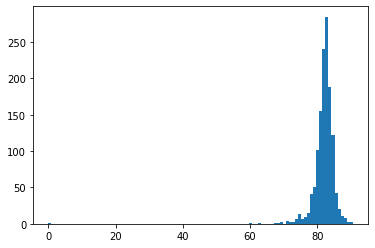

In [9]:
plt.hist(covfefe['Total.Cup.Points'],bins=100)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   3.,   1.,   3.,   5.,  12.,
         20.,  14.,  21.,  19.,  88.,  64.,  85., 115., 104., 292., 115.,
         87.,  87.,  55.,  78.,  21.,   6.,   9.,   6.,  14.,   2.,   1.,
          1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          4.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4

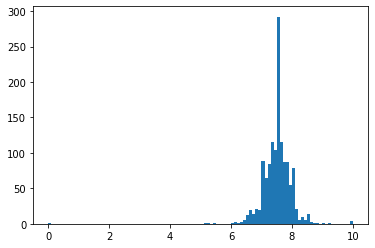

In [10]:
plt.hist(covfefe['Cupper.Points'],bins=100)

In [11]:
covfefe.describe()

,Altitude,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Year,Aroma,Flavor,Aftertaste,Acidity,Body,...,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,Expiration.Year
count,1111.000000,1339.000000,1339.000000,1291.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,...,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1339.000000
mean,1296.945995,154.182972,181.448096,2013.542215,2013.752054,7.566706,7.520426,7.401083,7.535706,7.517498,...,9.834877,9.835108,9.856692,7.503376,82.089851,0.088379,0.479462,0.173393,3.556385,2014.752054
std,394.437982,129.987162,1523.506781,1.822438,1.927630,0.377560,0.398442,0.404463,0.379827,0.370064,...,0.554591,0.763946,0.616102,0.473464,3.500575,0.048287,2.549683,0.832121,5.312541,1.927630
min,0.000000,0.000000,0.000000,2009.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,1100.000000,14.000000,1.000000,2012.000000,2012.000000,7.420000,7.330000,7.250000,7.330000,7.330000,...,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,2013.000000
50%,1311.000000,175.000000,60.000000,2013.000000,2014.000000,7.580000,7.580000,7.420000,7.580000,7.500000,...,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,2015.000000
75%,1600.000000,275.000000,69.000000,2015.000000,2015.000000,7.750000,7.750000,7.580000,7.750000,7.670000,...,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,2016.000000
max,2560.000000,1062.000000,19200.000000,2018.000000,2018.000000,8.750000,8.830000,8.670000,8.750000,8.580000,...,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,2019.000000


In [12]:
print(f"mean:{covfefe['Total.Cup.Points'].mean()}")
print(f"median:{covfefe['Total.Cup.Points'].median()}")
print(f"mode:{covfefe['Total.Cup.Points'].mode()}")

mean:82.08985063480209
median:82.5
mode:0    83.0
dtype: float64


<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br></br>

#### Mean, median, and mode all appear to be largely on top of each other. This, along with the Shapiro test below, leads me to conclude that the data are normally distributed.

In [13]:
shapiro(covfefe['Total.Cup.Points'])

ShapiroResult(statistic=0.6021165251731873, pvalue=0.0)

In [14]:
covfefe['Country.of.Origin'].value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Myanmar                           8
Vietnam                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Laos                        

In [15]:
covfefe['Harvest.Year'].value_counts()

2012.0    354
2014.0    253
2013.0    210
2015.0    157
2016.0    131
2017.0     89
2011.0     42
2010.0     33
2009.0     21
2018.0      1
Name: Harvest.Year, dtype: int64

In [16]:
covfefe['Altitude'].value_counts()

1200.0    68
1100.0    54
1400.0    52
1300.0    52
1500.0    46
          ..
1599.0     1
966.0      1
439.0      1
1677.0     1
957.0      1
Name: Altitude, Length: 205, dtype: int64

In [17]:
# average stats by Country of Origin

origin=covfefe.groupby('Country.of.Origin').mean()
origin

,Altitude,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Year,Aroma,Flavor,Aftertaste,Acidity,Body,...,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,Expiration.Year
Country.of.Origin,,,,,,,,,,,,,,,,,,,,,
Brazil,956.254717,231.318182,44.386364,2014.062992,2014.272727,7.553106,7.573561,7.440530,7.511439,7.544545,...,9.884924,9.853485,9.949394,7.562955,82.405909,0.082348,0.128788,0.446970,3.598485,2015.272727
Burundi,1790.000000,260.000000,60.000000,2014.000000,2014.000000,7.415000,7.460000,7.250000,7.415000,7.290000,...,10.000000,10.000000,10.000000,7.580000,81.830000,0.060000,0.000000,0.000000,2.500000,2015.000000
China,1463.187500,3.437500,45.500000,2014.500000,2015.437500,7.641250,7.625625,7.484375,7.578125,7.573750,...,9.958125,9.958125,9.916250,7.646875,82.927500,0.094375,0.000000,0.500000,4.000000,2016.437500
Colombia,1536.906040,225.158470,60.382514,2013.404494,2013.535519,7.653060,7.597104,7.524699,7.560000,7.609508,...,9.934426,9.945355,9.952678,7.620546,83.106557,0.062022,0.377049,0.208791,1.939891,2014.535519
Costa Rica,1472.282609,203.019608,1152.294118,2014.326531,2014.901961,7.671373,7.537255,7.534510,7.573922,7.537451,...,9.856275,9.869216,9.908431,7.663529,82.789020,0.083333,0.352941,0.117647,2.823529,2015.901961
Cote d?Ivoire,200.000000,2.000000,1.000000,2016.000000,2017.000000,7.420000,7.250000,6.830000,7.000000,7.330000,...,9.330000,10.000000,10.000000,7.080000,79.330000,0.130000,1.000000,0.000000,2.000000,2018.000000
Ecuador,420.000000,1.000000,3.000000,2015.000000,2015.000000,7.583333,7.640000,7.553333,7.693333,6.026667,...,10.000000,10.000000,8.723333,8.026667,80.220000,0.030000,0.000000,0.000000,0.333333,2016.000000
El Salvador,1333.157895,211.857143,43.238095,2013.761905,2014.238095,7.674762,7.654286,7.567143,7.590476,7.606667,...,9.936190,9.936190,9.808571,7.563333,83.052857,0.045714,0.142857,0.095238,3.571429,2015.238095
Ethiopia,1703.096774,267.295455,912.545455,2012.302326,2012.886364,7.896364,8.009091,7.893864,8.043636,7.924091,...,9.878409,9.954318,9.863409,8.048636,85.484091,0.082955,0.250000,0.363636,5.159091,2013.886364


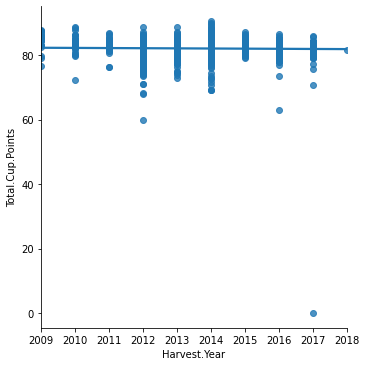

In [18]:
sns.lmplot(x='Harvest.Year',y='Total.Cup.Points',data=covfefe,ci=True)

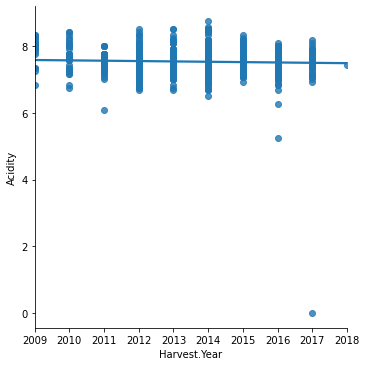

In [19]:
sns.lmplot(x='Harvest.Year',y='Acidity',data=covfefe,ci=True)

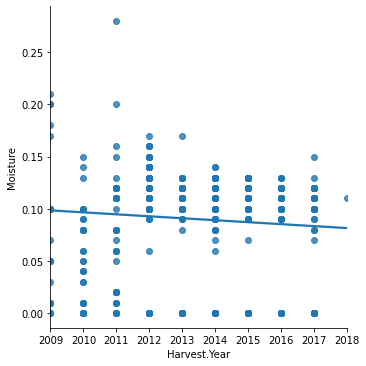

In [20]:
sns.lmplot(x='Harvest.Year',y='Moisture',data=covfefe,ci=True)

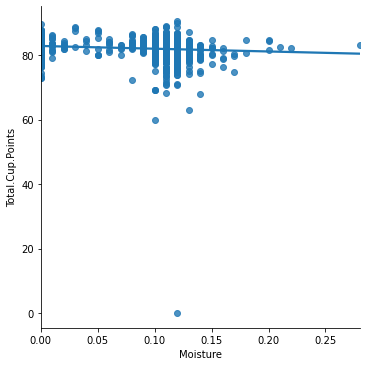

In [21]:
sns.lmplot(x='Moisture',y='Total.Cup.Points',data=covfefe,ci=True)

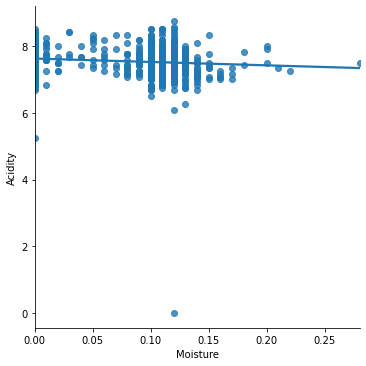

In [22]:
sns.lmplot(x='Moisture',y='Acidity',data=covfefe,ci=True)

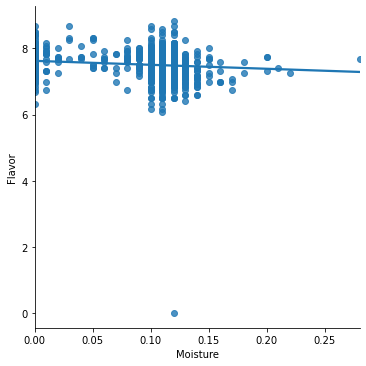

In [23]:
sns.lmplot(x='Moisture',y='Flavor',data=covfefe,ci=True)

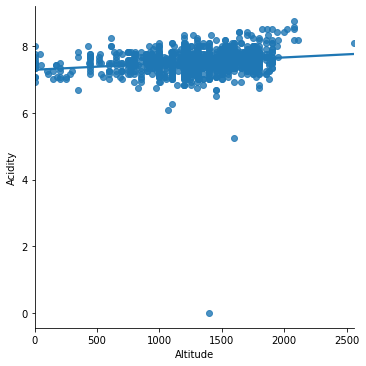

In [24]:
sns.lmplot(x='Altitude',y='Acidity',data=covfefe,ci=True)

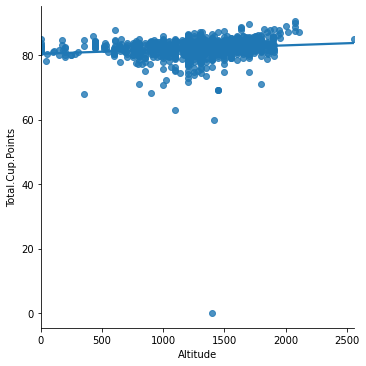

In [25]:
sns.lmplot(x='Altitude',y='Total.Cup.Points',data=covfefe,ci=True)

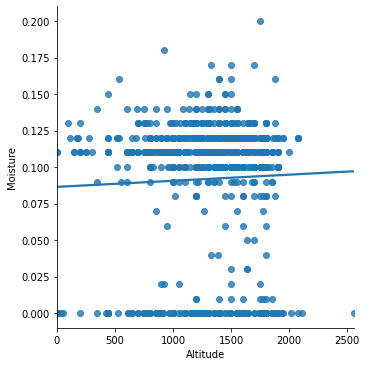

In [26]:
sns.lmplot(x='Altitude',y='Moisture',data=covfefe,ci=True)

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br>

#### Altitude is positively correlated with different flavor metrics, it seems. It's curious that altitude and moisture are also positively correlated, when moisture seems to be negatively correlated with different flavor metrics.

#### I want to look further into how change in altitude affects different flavor profiles and rates of defects...

In [27]:
alt=covfefe.groupby('Altitude').mean()
alt.drop(['Number.of.Bags','Bag.Weight','Harvest.Year','Grading.Year','Expiration.Year'],axis=1)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects
Altitude,,,,,,,,,,,,,,,
0.0,7.420000,7.330000,7.170000,7.33,7.420000,7.170000,10.0,10.0,10.00,7.250000,81.080000,0.110000,0.0,0.000000,1.000000
1.0,7.355000,7.555000,7.341667,7.43,7.570000,7.611667,10.0,10.0,10.00,7.645833,82.506667,0.009167,0.0,0.416667,1.916667
40.0,7.500000,7.670000,7.750000,7.75,5.170000,5.250000,10.0,10.0,8.42,8.580000,78.080000,0.000000,0.0,0.000000,0.000000
50.0,7.170000,7.170000,7.170000,7.42,7.170000,7.250000,10.0,10.0,10.00,7.170000,80.500000,0.000000,0.0,0.000000,0.000000
100.0,7.500000,7.170000,7.330000,7.25,7.170000,7.170000,10.0,10.0,10.00,7.250000,80.830000,0.130000,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019.0,8.000000,8.250000,8.080000,8.50,8.250000,8.000000,10.0,10.0,10.00,8.170000,87.250000,0.000000,0.0,0.000000,0.000000
2075.0,8.556667,8.666667,8.473333,8.61,8.446667,8.390000,10.0,10.0,10.00,8.636667,89.776667,0.120000,0.0,0.000000,1.000000
2080.0,8.000000,8.500000,8.580000,8.17,8.170000,8.000000,10.0,10.0,10.00,8.170000,87.580000,0.000000,0.0,0.000000,0.000000


In [28]:
alt['Total.Cup.Points'].describe()

count    205.000000
mean      82.438555
std        2.241385
min       72.830000
25%       81.125000
50%       82.333333
75%       83.420000
max       89.776667
Name: Total.Cup.Points, dtype: float64

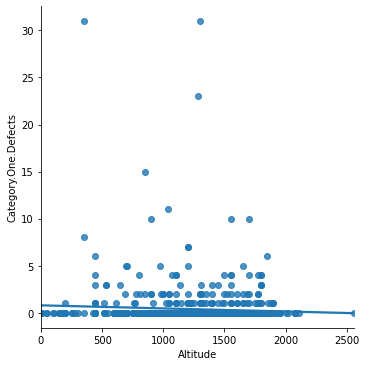

In [29]:
sns.lmplot(x='Altitude',y='Category.One.Defects',data=covfefe,ci=True)

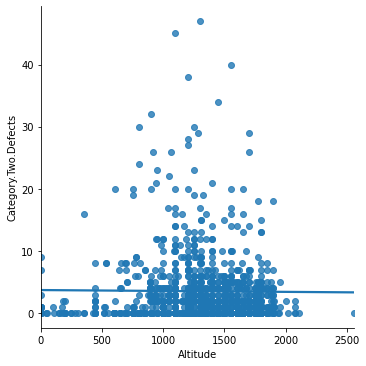

In [30]:
sns.lmplot(x='Altitude',y='Category.Two.Defects',data=covfefe,ci=True)

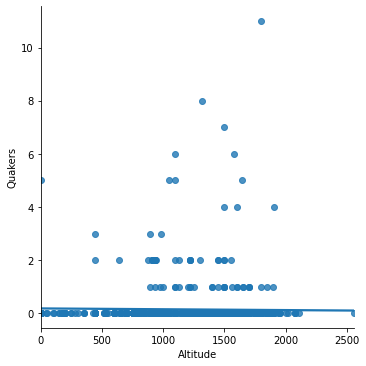

In [31]:
sns.lmplot(x='Altitude',y='Quakers',data=covfefe,ci=True)

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br>
</br>

#### Altitude doesn't seem to correlate with any defect rates...

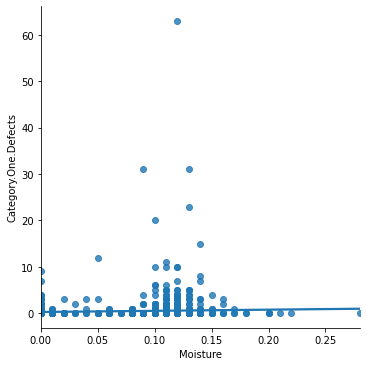

In [32]:
sns.lmplot(x='Moisture',y='Category.One.Defects',data=covfefe,ci=True)

'I assume cat 2 defects have something to do with moisture...?'

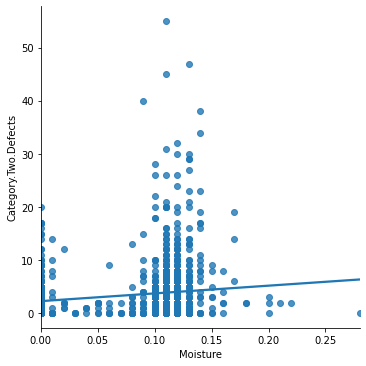

In [33]:
sns.lmplot(x='Moisture',y='Category.Two.Defects',data=covfefe,ci=True)
'''I assume cat 2 defects have something to do with moisture...?'''

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br></br>

#### Now, to look at 'Harvest.Year' as the independent variable:

In [34]:
year=covfefe.groupby('Harvest.Year').mean()
year.drop(['Altitude','Number.of.Bags','Bag.Weight','Grading.Year','Expiration.Year'],axis=1)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects
Harvest.Year,,,,,,,,,,,,,,,
2009.0,7.701905,7.761429,7.681429,7.891905,7.857143,7.809524,9.904286,9.936190,9.904286,7.916667,84.369524,0.078571,0.047619,0.000000,2.809524
2010.0,7.773030,7.774545,7.665455,7.693333,7.682121,7.792727,9.848182,9.777273,9.838182,7.691515,83.536667,0.052727,0.303030,0.000000,2.000000
2011.0,7.631905,7.628810,7.446190,7.509762,7.533571,7.622381,9.984048,10.000000,9.984048,7.547857,82.890714,0.083333,0.142857,0.000000,2.142857
2012.0,7.525989,7.459011,7.321808,7.498898,7.475763,7.443701,9.788814,9.715593,9.873729,7.413164,81.515932,0.102684,0.779661,0.000000,5.898305
2013.0,7.571095,7.484571,7.388429,7.524238,7.507286,7.520952,9.860095,9.895048,9.801905,7.464762,82.018810,0.095000,0.657143,0.000000,2.571429
2014.0,7.584783,7.540672,7.450000,7.553715,7.530119,7.563043,9.823281,9.815494,9.796996,7.528458,82.186917,0.085494,0.324111,0.000000,2.486166
2015.0,7.609108,7.582994,7.437134,7.569745,7.557325,7.537834,9.931975,9.970255,9.938917,7.549936,82.684904,0.086497,0.216561,0.184713,2.808917
2016.0,7.556947,7.541221,7.417176,7.531603,7.496947,7.485115,9.882748,9.928702,9.894351,7.605115,82.340229,0.074733,0.419847,1.083969,3.045802
2017.0,7.465955,7.439438,7.283371,7.454719,7.435955,7.423146,9.715281,9.767753,9.804270,7.412135,81.203483,0.088090,0.101124,0.528090,3.707865


In [35]:
year.describe()

,Altitude,Number.of.Bags,Bag.Weight,Grading.Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,Expiration.Year
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1310.394923,179.776121,190.538450,2013.821218,7.592072,7.563269,7.417099,7.564792,7.557623,7.552842,9.873871,9.880631,9.883668,7.545961,82.432718,0.085713,0.299195,0.279677,3.047086,2014.821218
std,105.540606,46.379350,234.059793,2.834032,0.092594,0.125835,0.174897,0.136166,0.123642,0.153692,0.087064,0.103838,0.074439,0.167070,0.975375,0.015761,0.257655,0.435353,1.112373,2.834032
min,1181.635417,109.471751,11.190476,2010.047619,7.465955,7.420000,7.080000,7.420000,7.435955,7.330000,9.715281,9.715593,9.796996,7.330000,81.203483,0.052727,0.000000,0.000000,2.000000,2011.047619
25%,1220.262387,160.633907,54.857684,2011.316788,7.533728,7.465401,7.338463,7.501614,7.497710,7.454054,9.829506,9.786828,9.812748,7.426063,81.689702,0.079762,0.111557,0.000000,2.507482,2012.316788
50%,1295.283238,182.018679,91.837945,2013.878722,7.577939,7.540947,7.427155,7.527921,7.518702,7.529393,9.871422,9.911875,9.884040,7.538158,82.263573,0.085995,0.259795,0.000000,2.809221,2014.878722
75%,1388.379487,199.351963,259.259842,2016.102835,7.626206,7.617356,7.449048,7.565738,7.551386,7.607547,9.925052,9.961739,9.930259,7.591320,82.839262,0.093272,0.395913,0.442246,3.034351,2017.102835
max,1495.920000,275.000000,775.258427,2018.000000,7.773030,7.774545,7.681429,7.891905,7.857143,7.809524,10.000000,10.000000,10.000000,7.916667,84.369524,0.110000,0.779661,1.083969,5.898305,2019.000000


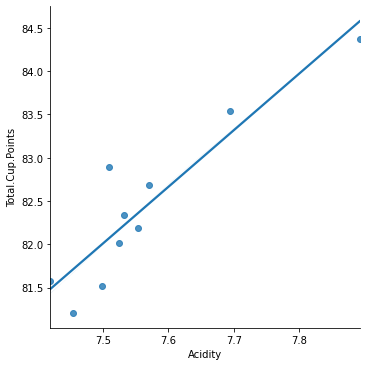

In [36]:
sns.lmplot(data=year,x='Acidity',y='Total.Cup.Points',ci=True)

'Moisture, again, demonstrating an inverse relationship with Total.Cup.Points...'

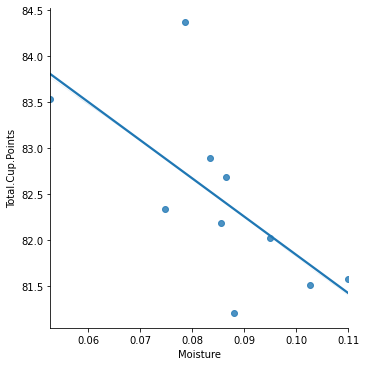

In [37]:
sns.lmplot(data=year,x='Moisture',y='Total.Cup.Points',ci=True)
'''Moisture, again, demonstrating an inverse relationship with Total.Cup.Points...'''

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br></br>

#### Unsurprisingly, acidity seems to be the strongest flavor metric affecting overall 'Total.Cup.Points' (as well as other flavor metrics). I would like to research what growing conditions are most likekly to affect coffee bean acidity -- and, thereby, overall cup quality -- and see how those metrics can be accounted for and predicted.

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br></br>

#### There seems to be an altitude "sweet spot." 'Total.Cup.Points' is positively correlated with 'Altitude,' but reaches its peak at ~2075m above sea level (masl), then decreasing from there.

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br></br>

#### Additional analysis should be done to delve into changes in weather conditions over time and how it affects other growing metrics, like 'Altitude.' 'Harvest.Year' and 'Country.of.Origin' will be compared over time, as well, with weather as the independent variable.

In [38]:
coo=covfefe[['Country.of.Origin','Total.Cup.Points','Altitude']].groupby('Country.of.Origin')
coo_avg=coo.mean().sort_values(by='Total.Cup.Points',ascending=False)
coo_avg

,Total.Cup.Points,Altitude
Country.of.Origin,,
Papua New Guinea,85.750000,1700.000000
Ethiopia,85.484091,1703.096774
Japan,84.670000,170.000000
United States,84.433000,1658.400000
Kenya,84.309600,1490.173913
Panama,83.707500,1515.000000
Uganda,83.451944,1590.823529
Colombia,83.106557,1536.906040
El Salvador,83.052857,1333.157895


<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br></br>

#### After further refreshing my pandas skills, I came back for more groupby insights.  I did not expect to see the US in the top 5 (of 36) countries by Total.Cup.Points, nor did I expect to see Brazil -- who boasts the largest number of coffee bean exports globally -- at number 16!

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br></br>

#### The below dataframe also seems to demonstrate that altitude only helps so much, with growth and weather conditions warranting further investigation. While Japan only had one entry out of 1339, it still boasted a highly-reviewed cup at an altitude of 170m. This may not be significantly relevant, but it may be worth keeping in mind.

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 20px; height: 40px">
</br>

Additionally, 20.31% of entries on this list were grown at altitudes between 1100 and 1500m(asl). This could be due to resource constraints experienced by farms on the list or due to industry standard practices; I will seek more domain knowledge to answer this question...

In [39]:
altitude=covfefe[['Altitude','Total.Cup.Points']].groupby('Altitude')
alt_avg=altitude.mean().sort_values(by='Total.Cup.Points',ascending=False)
alt_avg

,Total.Cup.Points
Altitude,
2075.0,89.776667
2000.0,89.000000
1635.0,88.306667
1823.0,88.250000
1905.0,88.080000
...,...
795.0,77.170000
1020.0,77.125000
1001.0,75.830000


<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br></br>

#### What is the pattern to altitude affecting coffee bean quality?

In [40]:
#prod=covfefe.groupby('Processing.Method').mean()
#prod.drop(['Altitude','Number.of.Bags','Bag.Weight','Grading.Year','Expiration.Year'],axis=1)

In [41]:
prod=covfefe[['Processing.Method','Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Sweetness','Clean.Cup','Cupper.Points','Total.Cup.Points']].groupby('Processing.Method')
prod_avg=prod.mean().sort_values(by='Total.Cup.Points',ascending=False)
prod_avg

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Clean.Cup,Cupper.Points,Total.Cup.Points
Processing.Method,,,,,,,,,,,
Pulped natural / honey,7.530000,7.511429,7.517857,7.536429,7.630714,7.518571,10.000000,10.000000,10.000000,7.564286,82.807857
Semi-washed / Semi-pulped,7.603929,7.587500,7.456607,7.541429,7.548393,7.576071,9.868750,9.952143,9.952143,7.544464,82.633571
Natural / Dry,7.588023,7.578372,7.452132,7.545930,7.590969,7.582868,9.782636,9.753527,9.795853,7.576202,82.245039
Washed / Wet,7.555190,7.485534,7.362933,7.527166,7.489620,7.482098,9.854233,9.927718,9.837951,7.444761,81.967816
Other,7.462308,7.445000,7.333077,7.402692,7.416538,7.451154,9.769231,9.846154,9.846154,7.305000,81.278462


<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br></br>

#### ^ Are the above numbers statistically relevant?

In [42]:
prod.describe()

Aroma                                          \
                           count      mean       std   min     25%   50%   
Processing.Method                                                          
Natural / Dry              258.0  7.588023  0.323263  6.75  7.4200  7.58   
Other                       26.0  7.462308  0.218363  7.17  7.2500  7.46   
Pulped natural / honey      14.0  7.530000  0.230284  7.17  7.3725  7.50   
Semi-washed / Semi-pulped   56.0  7.603929  0.290051  7.08  7.4200  7.58   
Washed / Wet               815.0  7.555190  0.310634  5.08  7.4200  7.58   

                                      Flavor            ... Cupper.Points  \
                            75%   max  count      mean  ...           75%   
Processing.Method                                       ...                 
Natural / Dry              7.75  8.58  258.0  7.578372  ...          7.83   
Other                      7.67  7.83   26.0  7.445000  ...          7.58   
Pulped natural / honey     7.67  8.00   14.0  7.511429  ...          7.58   
Semi-washed / Semi-pulped  7.75  8.50   56.0  7.587500  ...          7.75   
Washed / Wet               7.75  8.75  815.0  7.485534  ...          7.67   

                                Total.Cup.Points                              \
                            max            count       mean       std    min   
Processing.Method                                                              
Natural / Dry              8.67            258.0  82.245039  2.829122  67.92   
Other                      8.00             26.0  81.278462  3.998302  63.08   
Pulped natural / honey     8.17             14.0  82.807857  1.687243  80.08   
Semi-washed / Semi-pulped  8.42             56.0  82.633571  1.766705  78.75   
Washed / Wet               8.75            815.0  81.967816  2.680453  59.83   

                                                            
                               25%     50%      75%    max  
Processing.Method                                           
Natural / Dry              81.2500  82.750  83.8300  89.00  
Other                      80.7925  81.830  82.9575  84.67  
Pulped natural / honey     81.9550  82.665  83.2075  86.58  
Semi-washed / Semi-pulped  81.5000  82.500  83.6425  86.08  
Washed / Wet               81.0000  82.420  83.5000  90.58  

[5 rows x 88 columns]

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 35px; height: 75px">
</br></br>

#### ^ Considering results from the above .describe() command, it doesn't seem so. While 'Washed / Wet' seems to produce the least desirable results over the most samples (60.8%, to be exact), it also produced the highest-rated entry in the dataset. 'Natural / Dry' and 'Semi-washed / Semi-pulped' are the only other statistically relevant demographics, but their average stats don't appear different enough to warrant any further investigation into the 'Processing.Method' field.

</br>
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Checkpoint Summary:
</br>

### I would like to bring in additional weather data to compare with harvest years, altitudes, and countries of origin to see what weather-related trends may be affecting flavor metrics ('Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Moisture').

### My working hypothesis is that weather -- more than any other metric in this coffee dataset -- most strongly affects the overall coffee bean quality as defined by flavor metrics in said coffee dataset. 

In [43]:
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder as ohe
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix as cmx
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
ss=StandardScaler()

In [44]:
# At first, I tried using Total Cupper Points to determine qpality, but the results were terrible (gs.score result was 024...).  
# Acidity is the most correlated metric with overal cup quality (i.e., 'Flavor', 'Cupper.Points', etc.), so I will use that as my Y metric to see if my results change:

In [45]:
X=covfefe[['Altitude','Moisture','Grading.Year','Harvest.Year']]
y=covfefe['Total.Cup.Points']
yy=covfefe['Acidity']

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1024)

In [47]:
X_train,X_test,yy_train,yy_test=train_test_split(X,yy,random_state=1024)

In [48]:
X_train.fillna(X.mean().round(),inplace=True)
X_test.fillna(X.mean().round(),inplace=True)

y_train.fillna(y.mode().round(),inplace=True)
y_test.fillna(y.mode().round(),inplace=True)

yy_train.fillna(yy.mode().round(),inplace=True)
yy_test.fillna(yy.mode().round(),inplace=True)

/home/devon/anaconda3/envs/time/lib/python3.8/site-packages/pandas/core/series.py:4460: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 288 to 913
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Altitude      1004 non-null   float64
 1   Moisture      1004 non-null   float64
 2   Grading.Year  1004 non-null   int64  
 3   Harvest.Year  1004 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 39.2 KB


In [50]:
yy_train.tail()

601    8.00
613    7.67
492    7.58
609    7.42
913    7.25
Name: Acidity, dtype: float64

In [51]:
X_train_sc=ss.fit_transform(X_train,y_train)
X_test_sc=ss.transform(X_test)

xx_train_sc=ss.fit_transform(X_train,yy_train)

param1={'alpha':[.01,.1,1,10,99,100]}

In [52]:
pipe1=make_pipeline(RFE(LinearRegression()),HistGradientBoostingRegressor(max_bins=100))

In [53]:
param2=[
    {'rfe__estimator__n_jobs':[-1]},
    #{'rfe__estimator__normalize':range(len(X_train_sc))},
    {'histgradientboostingregressor__min_samples_leaf':[2056]},
    {'histgradientboostingregressor__random_state':[1024]}
]

gs1=GridSearchCV(pipe1,param2,n_jobs=-1)

In [54]:
gs1.fit(X_train_sc,y_train)

GridSearchCV(estimator=Pipeline(steps=[('rfe',
                                        RFE(estimator=LinearRegression())),
                                       ('histgradientboostingregressor',
                                        HistGradientBoostingRegressor(max_bins=100))]),
             n_jobs=-1,
             param_grid=[{'rfe__estimator__n_jobs': [-1]},
                         {'histgradientboostingregressor__min_samples_leaf': [2056]},
                         {'histgradientboostingregressor__random_state': [1024]}])

In [55]:
gs1.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'rfe', 'histgradientboostingregressor', 'rfe__estimator__copy_X', 'rfe__estimator__fit_intercept', 'rfe__estimator__n_jobs', 'rfe__estimator__normalize', 'rfe__estimator__positive', 'rfe__estimator', 'rfe__importance_getter', 'rfe__n_features_to_select', 'rfe__step', 'rfe__verbose', 'histgradientboostingregressor__categorical_features', 'histgradientboostingregressor__early_stopping', 'histgradientboostingregressor__l2_regularization', 'histgradientboostingregressor__learning_rate', 'histgradientboostingregressor__loss', 'histgradientboostingregressor__max_bins', 'histgradientboostingregressor__max_depth', 'histgradientboostingregressor__max_iter', 'histgradientboostingregressor__max_leaf_nodes', 'histgradientboostingregressor__min_samples_leaf', 'histgradientboostingregressor__monotonic_cst', 'histgradientboostingregressor__n_iter_no_change', 'histgradientboostingregressor__random_state', 'histgradientboostingregressor__scoring', 'histgradientb

In [56]:
# That score isn't great...

gs1.score(X_test_sc, y_test)

0.023364931400150724

In [57]:
pipe2=make_pipeline(PCA(),RFE(LogisticRegression()),HistGradientBoostingRegressor(max_bins=1_000))

In [66]:
param3=[
    {'rfe__estimator__C':[.01,.1,1,10,99,100]},
    {'rfe__estimator__n_jobs':[-1]},
    {'histgradientboostingregressor__max_bins':[1_048_576]},
    #{'histgradientboostingregressor__random_state':[1024]}
]

gs2=GridSearchCV(pipe2,param3,n_jobs=-1)

In [67]:
#gs2.fit(xx_train_sc,yy_train)

In [68]:
gs2.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pca', 'rfe', 'histgradientboostingregressor', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'rfe__estimator__C', 'rfe__estimator__class_weight', 'rfe__estimator__dual', 'rfe__estimator__fit_intercept', 'rfe__estimator__intercept_scaling', 'rfe__estimator__l1_ratio', 'rfe__estimator__max_iter', 'rfe__estimator__multi_class', 'rfe__estimator__n_jobs', 'rfe__estimator__penalty', 'rfe__estimator__random_state', 'rfe__estimator__solver', 'rfe__estimator__tol', 'rfe__estimator__verbose', 'rfe__estimator__warm_start', 'rfe__estimator', 'rfe__importance_getter', 'rfe__n_features_to_select', 'rfe__step', 'rfe__verbose', 'histgradientboostingregressor__categorical_features', 'histgradientboostingregressor__early_stopping', 'histgradientboostingregressor__l2_regularization', 'histgradientboostingregressor__learning_rate', 'histgradientboostingregressor__loss', 'histgradientboost

In [71]:
#gs2.score(xx_test_sc,yy_test)